In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset
df = pd.read_csv("Zomato data .csv")

In [4]:
# Define a function to handle the rating conversion
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

In [6]:
# Applying the function to the `rate` column
df['rate'] = df['rate'].apply(handleRate)

## Data preprocessing

In [7]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['online_order'] = label_encoder.fit_transform(df['online_order'])
df['book_table'] = label_encoder.fit_transform(df['book_table'])
df['listed_in(type)'] = label_encoder.fit_transform(df['listed_in(type)'])

In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,0
1,Spice Elephant,1,0,4.1,787,800,0
2,San Churro Cafe,1,0,3.8,918,800,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,0
4,Grand Village,0,0,3.8,166,600,0


## selecting features and target variable and splitting the dataset into train test 

In [10]:
X = df[['online_order', 'book_table', 'votes', 'approx_cost(for two people)', 'listed_in(type)']]
y = df['rate']

In [11]:
# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model building

In [12]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

## Model Evalutaion

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [14]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Value: {r2}")

Mean Squared Error: 0.17959238721556148
R-Squared Value: 0.15798526519063716


## Feature impotance Analysis

In [15]:
importances = model.feature_importances_
feature_names = X.columns

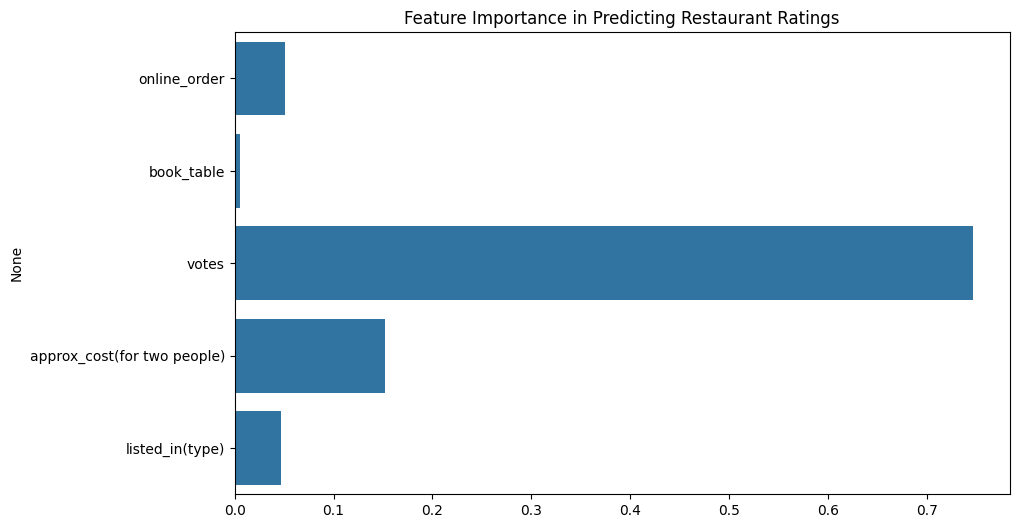

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Predicting Restaurant Ratings')
plt.show()

### conclusion

1. votes have the highest feature importance, we can conclude that customer engagement (as indicated by the number of votes) is the strongest predictor of restaurant ratings.
2. cost is highly important, it suggests that higher-cost restaurants tend to have better ratings, which can inform pricing strategies.